In [1]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
from lib.histo_utilities import create_TH1D
import ROOT as rt

Welcome to JupyROOT 6.10/08


In [119]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [105]:
fname = '../../../www/FNAL_TB_1811/vr2/Run_1694-1733_Analysis_SiPM_Tile_vr2/TimeResolution_ch14.txt'
d = []

with open(fname, 'r') as f:
    for l in f.readlines():
        if l[0] == '#':
            continue
        l = l.split()
        d.append([float(l[0]), float(l[1]), l[2], l[3], True if l[4]=='True' else False])
d = np.array(d)

In [106]:
i_best = np.argmin(d[:,0].astype(np.float))
print d[i_best]

['40.46' '0.0' 'LP1_60' 'FL_50' 'True']


In [107]:
d

array([['86.35', '0.01', 'LP2_10', 'gaus_mean', 'False'],
       ['69.82', '0.01', 'LP2_10', 'gaus_mean', 'True'],
       ['64.83', '0.01', 'LP2_20', 'gaus_mean', 'False'],
       ...,
       ['3542.82', '0.0', 'FL_650mV', 'FL_650mV', 'True'],
       ['3541.16', '0.0', 'FL_700mV', 'FL_650mV', 'False'],
       ['3544.74', '0.0', 'FL_700mV', 'FL_650mV', 'True']], dtype='|S32')

In [51]:
l = []
for x in d:
    if float(x[0]) < 60. and not x[3] in l:
        l.append(x[3])

print l

['gaus_mean', 'IL_20', 'IL_30', 'IL_50', 'IL_60', 'LP1_20', 'LP1_30', 'LP1_50', 'LP1_60', 'FL_20', 'FL_30', 'FL_50', 'FL_60']


In [59]:
d[:,3] == 'gaus_mean'

array([ True,  True,  True, ..., False, False, False])

In [62]:
for vref in l:
    sel = d[:,3] == vref
    r = d[sel, 0].astype(np.float)
    print vref, np.min(r)

gaus_mean 40.98
IL_20 47.31
IL_30 41.33
IL_50 41.12
IL_60 40.99
LP1_20 43.12
LP1_30 42.43
LP1_50 40.87
LP1_60 40.86
FL_20 43.02
FL_30 41.87
FL_50 40.46
FL_60 41.06


In [164]:
def plot_scan(d, vref):
    d_res = {}
    
    for x in d:
        if float(x[0]) < 60. and x[3] == vref:
            tag = x[2][:x[2].find('_')+1]
            
            if x[2].endswith('mV'):
                thr = int(x[2][x[2].find('_')+1:-2])
                tag += 'mV'
            else:
                thr = int(x[2][x[2].find('_')+1:])
                
            if not tag in d_res.keys():
                d_res[tag] = []
            d_res[tag].append([thr, float(x[0]), float(x[1])])
    
    ext_amp = 900
    style_dic = {}
    
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlabel('Constant Threshold [mV]')
    ax1.set_ylabel('Avg time resolution [ps]')
    ax1.set_xlim(0, ext_amp*1.1)
    ax1.grid()
    
    ax2 = ax1.twiny()
    ax2.set_xlabel('Constant Fraction [%]')
    ax2.set_xlim(0, 110)
    
    for t in d_res.keys():
        d_res[t] = np.array(d_res[t])
        a = d_res[t]
        
        var = t[:t.find('_')]
        if not var in style_dic:
            i = len(style_dic.keys())
            style_dic[var] = 'C'+str(i)
        
        if t.endswith('mV'):
            ax1.plot(a[:,0], a[:,1], color=style_dic[var], label=var+' CT', lw=2, ls='--', marker='1')
        else:
            ax2.plot(a[:,0], a[:,1], color=style_dic[var], label=var+' CF', lw=2, ls='-', marker='2')
        
    
    ax1.legend(loc='lower right', frameon=False)
    ax2.legend(loc='upper right', frameon=False)
    fig.tight_layout()
    
    return d_res

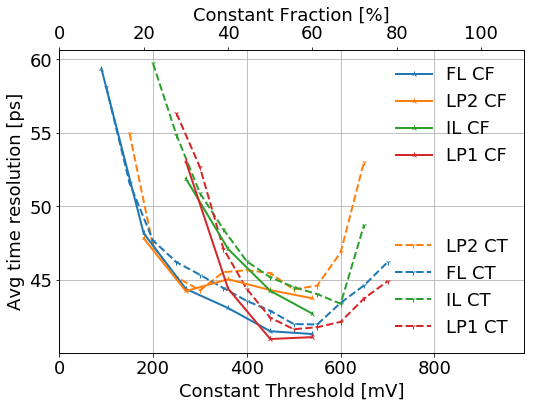

In [165]:
d_res = plot_scan(d, 'gaus_mean')

In [114]:
d_res.keys()

['FL_', 'LP2_mV', 'LP2_', 'FL_mV', 'IL_', 'IL_mV', 'LP1_', 'LP1_mV']

In [67]:
s.find('_')

2